In [ ]:
#1. load data
#2. preprossing the data

In [1]:
import tensorflow as tf
import os

In [2]:
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir="C:/Users/igloo/Documents/deep learning projects/cat _vs_dog/data"

In [5]:
image_exts=["jpeg","jpg","bmp","png"]

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            immg=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("issue with image {}".format(image_path))

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data=tf.keras.utils.image_dataset_from_directory("data")

Found 184 files belonging to 2 classes.


In [11]:
data_iterator= data.as_numpy_iterator()

In [12]:
data_iterator

In [13]:
#get another batch from the iterator
batch= data_iterator.next()

In [30]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:
#class 1 = sad
# class 0 = happy
batch[1]

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

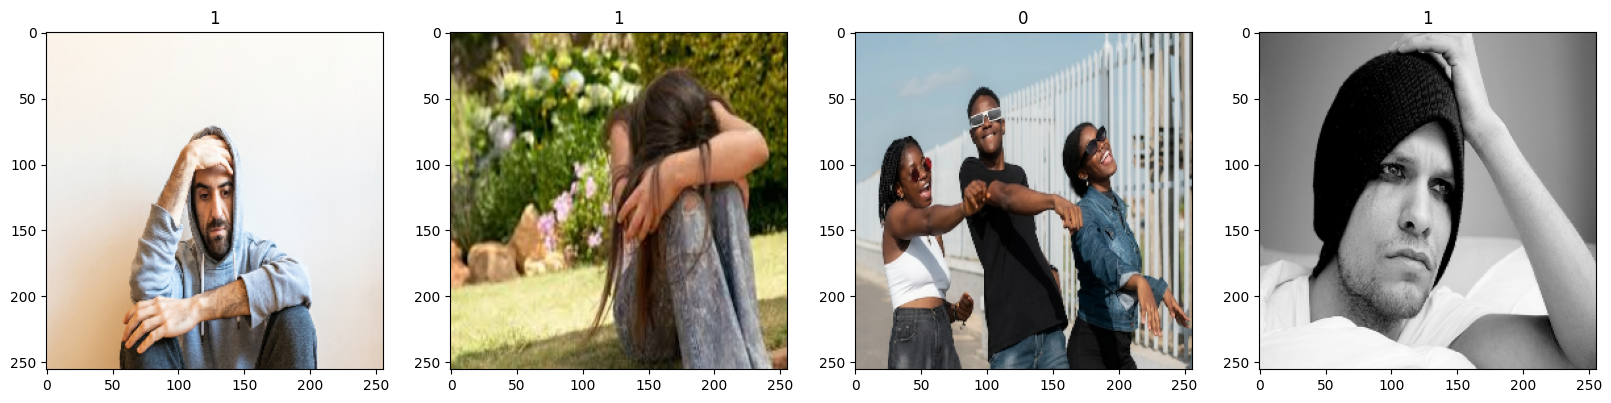

In [24]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
# here we are trying to convert the value to be between 1 and 0 so to do that we need to divide every thing by 255
scaled= batch[0]/255

In [28]:
scaled.max()

1.0

In [32]:
#scale all the data
data=data.map(lambda x, y: (x/255, y))

In [39]:
scaled_iterator=data.as_numpy_iterator().next()

In [40]:
scaled_iterator

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [41]:
# split data
len(data)

6

In [54]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [55]:
train_size


4

In [56]:
val_size


1

In [57]:
test_size

1

In [58]:
train= data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [63]:
model= Sequential()

In [64]:
#adding convo layer and max layer
model.add(Conv2D(16, (3,3),1, activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [65]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

In [67]:
# train
logdir="logs"

In [68]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 9s 230ms/step - loss: 1.3366 - accuracy: 0.5000 - val_loss: 0.9996 - val_accuracy: 0.4062
Epoch 2/20
4/4 [==============================] - 1s 173ms/step - loss: 0.7463 - accuracy: 0.5312 - val_loss: 0.6490 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 1s 175ms/step - loss: 0.6111 - accuracy: 0.5703 - val_loss: 0.6506 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 1s 183ms/step - loss: 0.5335 - accuracy: 0.7266 - val_loss: 0.4806 - val_accuracy: 0.7812
Epoch 5/20
4/4 [==============================] - 1s 174ms/step - loss: 0.4320 - accuracy: 0.8359 - val_loss: 0.3739 - val_accuracy: 0.8750
Epoch 6/20
4/4 [==============================] - 1s 172ms/step - loss: 0.3451 - accuracy: 0.8438 - val_loss: 0.3747 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 1s 176ms/step - loss: 0.2735 - accuracy: 0.9062 - val_loss: 0.2944 - val_accuracy: 0.8438
Epoch 8/20
4/4 [====

In [70]:
hist.history

{'loss': [1.336571455001831,
  0.746319055557251,
  0.6110774874687195,
  0.5334683656692505,
  0.43204265832901,
  0.34510481357574463,
  0.27354466915130615,
  0.29063817858695984,
  0.2258756160736084,
  0.19498567283153534,
  0.1411013901233673,
  0.1086062341928482,
  0.09828300029039383,
  0.057481519877910614,
  0.02865295670926571,
  0.016668997704982758,
  0.012563546188175678,
  0.012413776479661465,
  0.0074194371700286865,
  0.005745702423155308],
 'accuracy': [0.5,
  0.53125,
  0.5703125,
  0.7265625,
  0.8359375,
  0.84375,
  0.90625,
  0.8671875,
  0.921875,
  0.9453125,
  0.9609375,
  0.96875,
  0.9765625,
  1.0,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.9996408820152283,
  0.6489704847335815,
  0.6506323218345642,
  0.48063039779663086,
  0.3738771677017212,
  0.37474876642227173,
  0.29435116052627563,
  0.22955068945884705,
  0.3920300602912903,
  0.24447862803936005,
  0.14016467332839966,
  0.13965195417404175,
  0.04628875106573105,
  0.0494

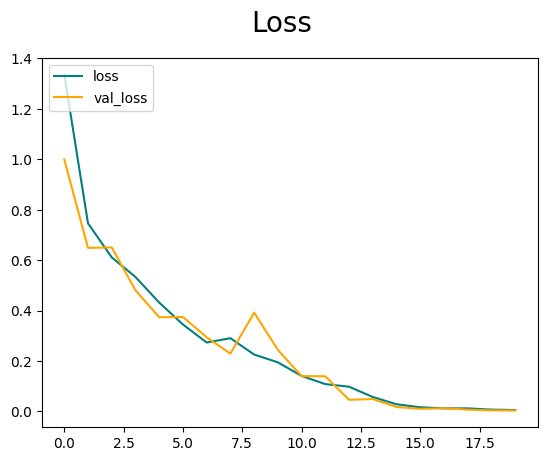

In [72]:
fig=plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"],color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

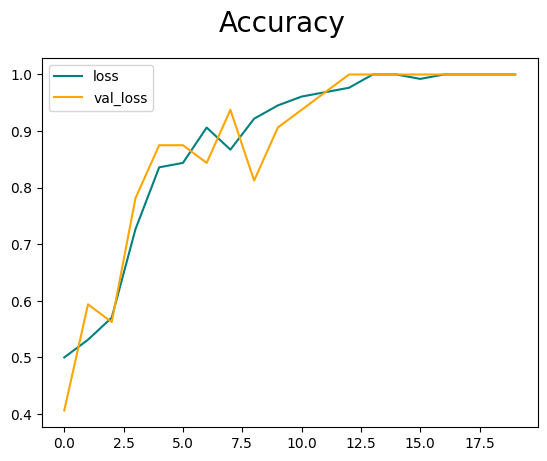

In [73]:
fig=plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="loss")
plt.plot(hist.history["val_accuracy"],color="orange", label="val_loss")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [75]:
# evaluation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [76]:
pre= Precision()
re= Recall()
acc=BinaryAccuracy()

In [77]:
len(test)

1

In [78]:
for batch in test.as_numpy_iterator():
    X, y= batch
    yhat=model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 613ms/step


In [79]:
print(f"Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}")

Precision:1.0, Recall:1.0,Accuracy:1.0


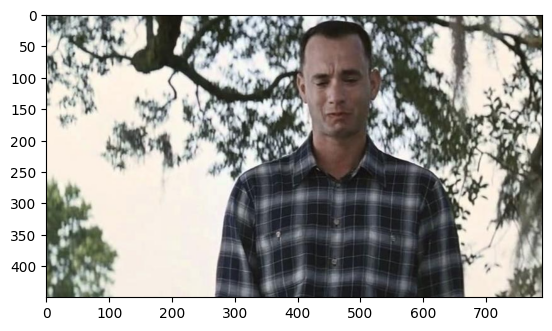

In [103]:
#testg
img=cv2.imread("C:/Users/igloo/Documents/deep learning projects/faces/data/sad_test.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

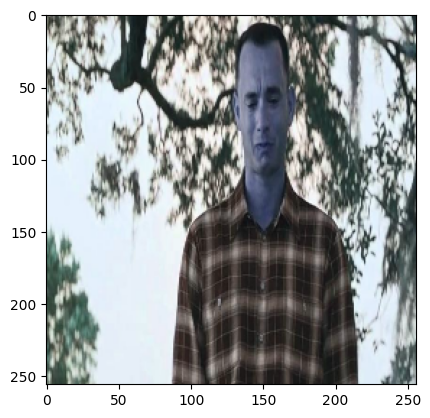

In [104]:
resize=tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [105]:
yhat=model.predict(np.expand_dims(resize/256,0))

1/1 [==============================] - 0s 16ms/step


In [106]:
yhat

array([[0.99611425]], dtype=float32)

In [107]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'predicted class is happy')

Predicted class is Sad


In [108]:
#save model
from tensorflow.keras.models import load_model

In [111]:
model.save(os.path.join("models","C:/Users/igloo/Documents/deep learning projects/cat _vs_dog/data/happysad.model.h5"))

In [112]:
new_model=load_model(os.path.join("models","C:/Users/igloo/Documents/deep learning projects/cat _vs_dog/data/happysad.model.h5"))

In [113]:
yhat=new_model.predict(np.expand_dims(resize/256,0))

1/1 [==============================] - 0s 205ms/step


In [114]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'predicted class is happy')

Predicted class is Sad
